In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

denver_rent = pd.read_csv('/Users/raychilds/Downloads/Denver_Rent.csv')
co_mj_tax_rev = pd.read_csv('/Users/raychilds/Downloads/co_mj_tax_rev.csv')
us_median_rent = pd.read_csv('/Users/raychilds/Downloads/us_median_rent.csv')
marijuana_revenue = pd.read_csv('/Users/raychilds/Downloads/MarijuanaRevenue.csv')
occupations_co = pd.read_csv('/Users/raychilds/Downloads/occupations_co.csv')

# A Look at Colorado Since 2012 


### On 6 November 2012, Colorado became the first state alongside Washington state to legalize marijuana recreationally, under Proposal and later, Amendment, 64.

### Nearly eight years later, the rest of the United States along with the world look to these trailblazers' groundbreaking legislature to find out how the legalization of marijuana on grounds other than medical is affecting the economy, culture, tourism, migration, etcetera of the Centinnial state.


# The Data


### I've chosen three main datasets, and two supplements to help support the investigation into the changes that have occured since Colorado underwent such a drastic legislative and cultural shift. Marijuana Revenue comes to us from the City and County of Denver's Open Data Catalog, listing the departments and areas of Colorado culture that the new tax revenue has been allocated to since the implemention and approval of Proposal 64 in approximately December 2012. Any source of new tax revenue is an exciting feature of a government to see where it will go and eventually what will be touched by it.

### Two datasets come to us from Zillow, an online real estate marketplace with a wealth of data about rent trends in the United States. One explores the average rent for a one-bedroom apartment in the county of Denver by year, and the other lists the average rents for one-bedroom apartments in the rest of the United States. This is important to understand how the population of Colorado, specifically the capital Denver has been affected by the popular culturally fashionable decision made by the voters that year.

### The fifth dataset explores the changes in occupations in Colorado between 2012 and the projections for 2022. These are categorized by employment levels, changes annually as well as the totals for all eleven years. Here we'd like to see how an entirely new industry (marijuana for commercial sake) affects the job economy of Colorado.

# A History of Marijuana in Colorado

### Forms of marijuana were legal in Colorado prior to 2012. In 1975, the state of Colorado decriminalized marijuana (lowered the priority of prosecuting cases). In 2000, marijuana was legalized for medical use (prescription by medical professionals only), and, finally, Proposal 64 was voter-approved by 57.13% compared to 42.87%, against, in 2012. [Stats from Ballotpedia](https://ballotpedia.org/California_Proposition_64,_Marijuana_Legalization_(2016)

Proposal 64 Results


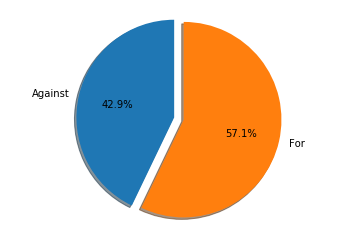

In [79]:
labels = 'Against', 'For'
sizes = [42.87, 57.13]
explode = (0.1, 0)      
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
print("Proposal 64 Results")
plt.show()

# First, What Exactly Does Amendment 64 Entail?

### Amendment 64 outlines a statewide drug policy for recreational marijuana. Amendment 64 drafted the outline for the newfound rights of adults aged 21 and older buying and/or growing marijuana, for non-medical reasons from commercially-licensed enterprises, as well as taxing consumers, importantly.

# 1) How is Marijuana Tax Revenue Distributed Back to the State of Colorado? 

### Among the first thoughts one may have had when the Proposal passed in 2012, one wonders how the government will handle a historically stigmatized substance handled previously and extensively by underground cultures and cartels, due to the nature of the law before 2012.

### Below we'll see the cumulative tax revenue in a two year period.

In [80]:
df = co_mj_tax_rev 
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')
co_mj_tax_rev[3 : 29] 

,State of Colorado,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,Feb 2014,"$1,330,209","$1,401,568","$195,318","$592,661","$3,519,756","$3,519,756",NaN,NaN,NaN,NaN,NaN,NaN
4,Mar 2014,"$1,460,429","$1,434,916","$339,615","$857,615","$4,092,575","$7,612,330",NaN,NaN,NaN,NaN,NaN,NaN
5,Apr 2014,"$1,569,405","$1,898,685","$609,907","$902,995","$4,980,992","$12,593,322",NaN,NaN,NaN,NaN,NaN,NaN
6,May 2014,"$1,559,710","$2,217,607","$734,351","$761,687","$5,273,355","$17,866,677",NaN,NaN,NaN,NaN,NaN,NaN
7,Jun 2014,"$1,569,454","$2,070,577","$1,135,648","$940,028","$5,715,707","$23,582,384",NaN,NaN,NaN,NaN,NaN,NaN
8,Jul 2014,"$1,530,968","$2,473,627","$969,637","$1,547,853","$6,522,085","$30,104,468",NaN,NaN,NaN,NaN,NaN,NaN
9,Aug 2014,"$1,659,789","$2,970,183","$1,397,930","$1,379,549","$7,407,450","$37,511,919",NaN,NaN,NaN,NaN,NaN,NaN
10,Sep 2014,"$1,892,780","$3,307,078","$1,464,796","$1,076,513","$7,741,167","$45,253,086",NaN,NaN,NaN,NaN,NaN,NaN
11,Oct 2014,"$1,795,545","$2,940,346","$1,446,105","$1,050,874","$7,232,870","$52,485,956",NaN,NaN,NaN,NaN,NaN,NaN
12,Nov 2014,"$1,816,579","$3,244,159","$1,718,273","$863,790","$7,642,800","$60,128,755",NaN,NaN,NaN,NaN,NaN,NaN


### The cumulative tax revenue for recreational marijuana sales in the span of a year (2016) is 237,915,471 dollars. So where does a number like that flow back into? Let's take a look at where that money is being spent to date: 

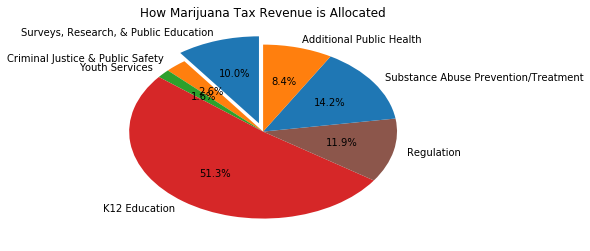

In [81]:
df =  marijuana_revenue
Allocated = df["Allocated"]
Percentage = df["Percentage"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1, 0, 0, 0, 0, 0, 0)  
plt.pie(Percentage, labels=Allocated, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=90)
plt.title("How Marijuana Tax Revenue is Allocated")
plt.show()

### Interestingly, over half of the funds have been funneled into K-12 Education. We can make an inference from this that K-12 Education is an area of Colorado life that needs dire addressing if this is where most of this new revenue is going first and foremost. Substance Abuse Prevention/Treatment is also a major problem in Colorado, on the same basis, now ironically relieved by the revenues of a formerly illegal substance. Another thing to note, the third largest portion of the tax revenue is used to regulate the marijuana industry itself. 

### These may not be changes that have occurred already to the state of Colorado, but they are more than likely the facets of life in the Centennial state that will change most drastically, soon, as they now have a fresh stream of funds flowing into their revivals. This may be the most interesting set of a data from other state government's curiosity; the idea that taxing a substance that is more than likely not going away in the life of the citizens, can at the very least bring new resources for the parts of the culture that need the most care. 

# 2) How Has Colorado's Population Changed Since Amendment 64? 

###  In order to answer this question, it's useful to look up the rent trends in Colorado. We can assume that if rent is below the national average, there's low demand for housing, thus, low populations levels. However, if rent is, say, above the national average then there must be a demand for housing, healthy business activity in the area, thus, a higher population. But what is high and what is low, and is it all correlated with Amendment 64? We'll have to look back to around 1998, and forward to around 2015, and then, as mentioned, compare to 49 other state averages from one-bedroom apartments. 

In [82]:
denver_rent

,region,subRegion,apartmentType,quarter,year,averageRent
0,Denver Metro,Adams,1 Bed,1,1998,561.340000
1,Denver Metro,Adams,1 Bed,2,1998,501.850000
2,Denver Metro,Adams,1 Bed,3,1998,565.030000
3,Denver Metro,Adams,1 Bed,4,1998,552.730000
4,Denver Metro,Adams,1 Bed,1,1999,588.610000
5,Denver Metro,Adams,1 Bed,2,1999,552.150000
6,Denver Metro,Adams,1 Bed,3,1999,555.640000
7,Denver Metro,Adams,1 Bed,4,1999,555.200000
8,Denver Metro,Adams,1 Bed,1,2000,542.580000
9,Denver Metro,Adams,1 Bed,2,2000,587.170000


### In 1998, the average rent for a one bedroom apartment in Denver, Colorado was 378 dollars; in 2000, 443. In 2012, a one bedroom apartment hit 1,653 dollars. A few years later, in 2014, 1,686 dollars. 

### Let's look at the average rent price in the United States for comparision.

In [83]:
(values, counts) = np.unique(us_median_rent['Median 1 BR Rent'], return_counts=True)
ind = np.argmax(counts)
values[ind]

610

In [84]:
us_median_rent.describe('')

,Median 1 BR Rent
count,50.000000
mean,848.000000
std,248.423601
min,560.000000
50%,790.000000
max,1470.000000


### Our US Median Rent dataset reveals an average of 848 dollars for a one bedroom apartment in the US.
### Rent for one-bedrooms in Denver, Colorado are, therefore, above average. From this we can draw that the population has in fact increased, but not drastically between the years 2012 to 2015; it doesn't appear to have affected the growth in population. 

# 3) What are Employment Rates in Colorado? 

### One of the most important indicators of a state's economy is job growth or decay. 

In [85]:
occupations_co

,Occupation,Occupation Code,2012 Estimated Employment,2022 Projected Employment,Total 2012-2022 Employment Change,Annual Avg. Percent Change,Total Percent Change
0,Total All,0,2498255,3047658,549403,2%,22%
1,Architecture and Engineering,170000,55714,69771,14057,2.3%,25.2%
2,"Arts, Design, Entertainment, Sports, and Media",270000,55442,65253,9811,1.6%,17.7%
3,Building and Grounds Cleaning and Maintenance,370000,93416,114674,21258,2.1%,22.8%
4,Business and Financial Operations,130000,161349,206855,45506,2.5%,28.2%
5,Community and Social Services,210000,34652,44054,9402,2.4%,27.1%
6,Computer and Mathematical,150000,96473,125065,28592,2.6%,29.6%
7,Construction and Extraction,470000,133412,173515,40103,2.7%,30.1%
8,"Education, Training, and Library",250000,134632,164146,29514,2%,21.9%
9,"Farming, Fishing, and Forestry",450000,10862,12143,1281,1.1%,11.8%


In [86]:
df = occupations_co

Text(0.5,1,'Total Percent Change in Colorado Occupations 2012 - 2022')

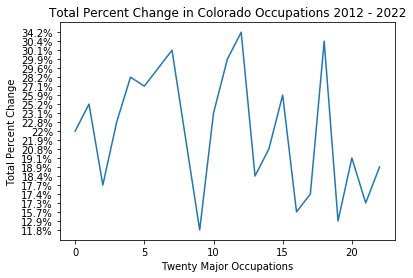

In [87]:
plt.plot(df['Total Percent Change'])
plt.xlabel('Twenty Major Occupations')
plt.ylabel('Total Percent Change')
plt.title('Total Percent Change in Colorado Occupations 2012 - 2022')

### If we look at the 22 listed industries in Colorado, we can see high positive total percent changes in growth of the occupations from 2012 to projected 2022. 

### The employment levels between 2012 and 2022 are expected to grow, leading us to believe that there's a positive outlook for citizens of Colorado, probably especially those who come from other states with lower employment levels. 


# Further Research 

### Tourism is another facet of the economy that would be interesting to see how marijuana has affected. For instance, how hotels, apartment buildings, and AirBNB policies have had to adapt to tourists in Colorado specifically looking to consume a substance that could potentially damage their rooms, etc. It leads you to wonder the hidden affects of people with no place to smoke heading to the streets and cars. An additional dataset to analyze could be whether or not we've found out out since Amendment 64 how exactly marijuana affects driving, car accident rates, and fatalities. 


### I would like to be able to analyze the effects of the upward trending rent prices in Denver, such as a rent bubble, homelessness, tourism, gentrification, etc. I want to gain the skills to know well the best graphs to present this kind of information, I will go about this by studying the psychology of graphics and how it affects the readers understanding. Perhaps it would be good to consider the specialization of economics in the bootcamp to learn linear regression type modeling, and analyzing panel data.

### Id like to learn the ability to think more critically about the best questions to analyze a dataset. I think this also requires more sound logic in storytelling, first learning how to put together an outline, persay for a report such as this, spending time and energy on what you will do, and then the report will go more smoothly as you set forth to put it together.

### Further research on the pharmaceutical industry and it's effects since 2012 would be interesting as well, probably independent of medical marijuana which is given strictly to a list of major medical concerns, in comparision to simple headaches of nausea of the every day person, which is what medical marijuana is used for on a larger scale. 